# Implementation of ANN using Keras:

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.19642&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Avoiding Overfitting Through Regularization

Regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting. Regularization can be applied to objective functions in ill-posed optimization problems.



# L1 Regularization | Lasso | Least Absolute:
$j_n(\theta ) = j_0(\theta ) + \alpha \sum_{i=1}^{m}\left | \theta_i \right |$

# L2 Regularization | Ridge
$j_n(\theta ) = j_0(\theta ) + \frac{\alpha}{2} \sum_{i=1}^{m}(\theta_i)^2$


# L1 - L2 Regularization 
$j_n(\theta ) = j_0(\theta ) + r\alpha \sum_{i=1}^{m}\left | \theta_i \right | + \frac{(1-r)}{2} \alpha \sum_{i=1}^{m}(\theta_i)^2$


# Dropout:
[Refer the paper](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

In [8]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [9]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tensorflow.keras.__version__}")

Tensorflow Version 2.15.0
Keras Version 2.15.0


# GPU / CPU Check

In [10]:
tf.config.list_physical_devices("GPU")

[]

In [11]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [12]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using keras on MNIST data

In [13]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [14]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
len(X_test[1][0])

28

In [17]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [18]:
len(X_train_full[5000:] )

55000

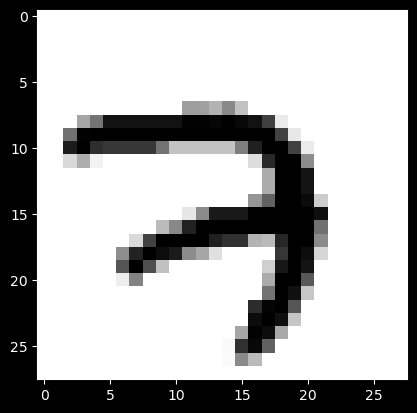

In [19]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

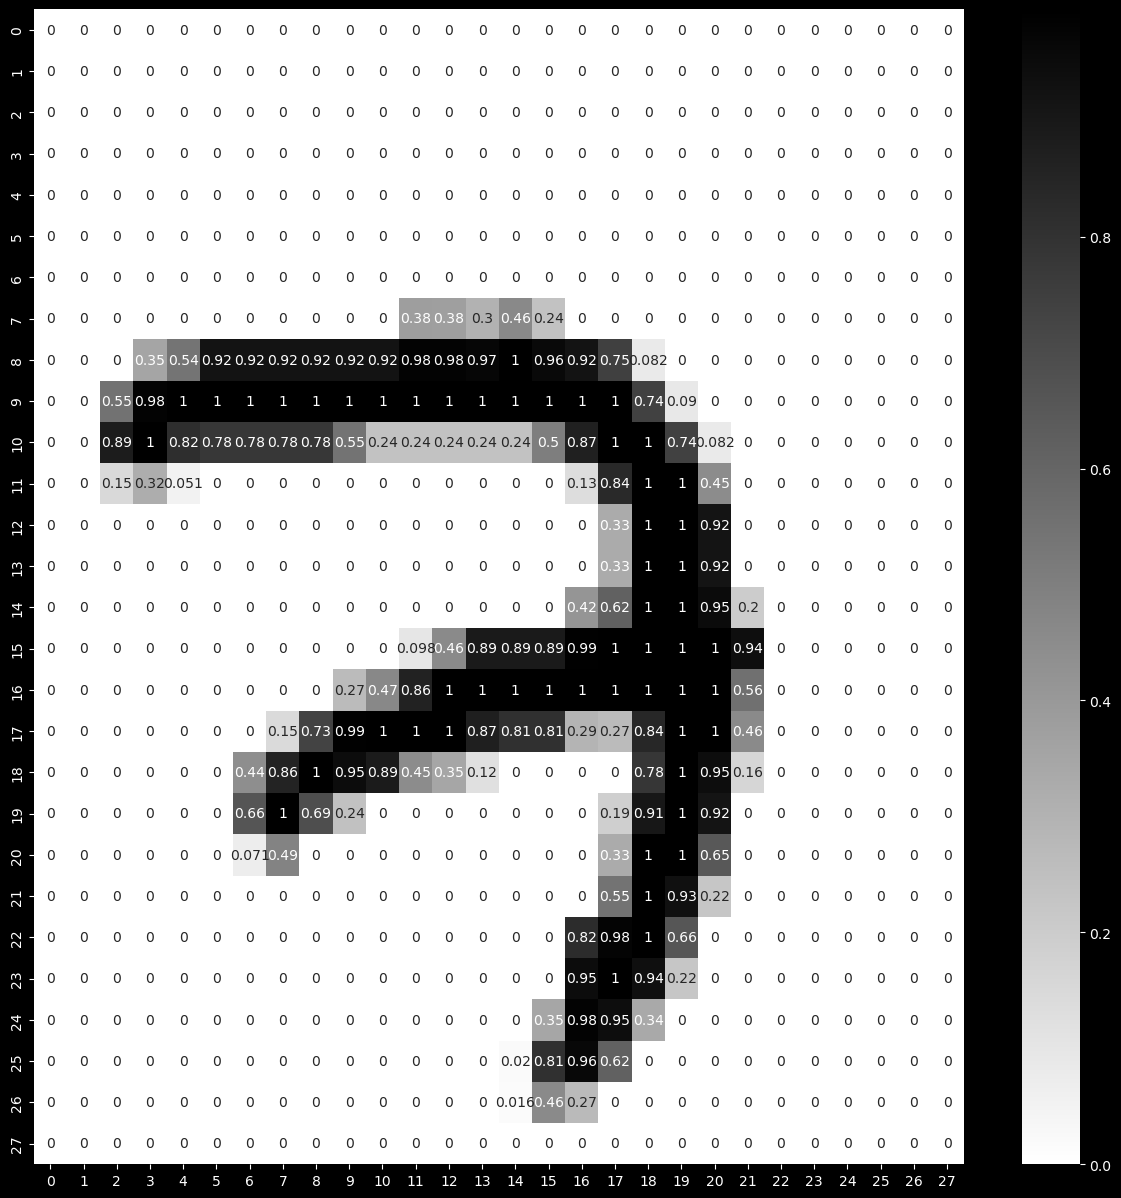

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500"
height="300">

In [28]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1", kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2", kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

model_clf = tf.keras.models.Sequential(LAYERS)

In [29]:
model_clf.layers

In [30]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                       

In [ ]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [32]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [33]:
len(hidden1.get_weights()[1])

300

In [34]:
hidden1.get_weights()

[array([[-0.07253473, -0.03113383, -0.00378953, ...,  0.04469662,
          0.06645134, -0.01992376],
        [ 0.00111783,  0.00199212, -0.06577964, ...,  0.07170787,
         -0.04912497,  0.01831622],
        [-0.02296495, -0.06574526,  0.06127198, ...,  0.03937992,
          0.01958293, -0.05222336],
        ...,
        [-0.07145934,  0.00143868,  0.01395068, ..., -0.02240816,
         -0.06461483, -0.00737806],
        [ 0.00654587, -0.03173565, -0.05704173, ...,  0.07424252,
          0.03147245, -0.02789513],
        [-0.03643809, -0.00249337, -0.0525008 , ...,  0.01505766,
          0.05901478,  0.05287686]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [35]:
weights, biases = hidden1.get_weights()

In [36]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.07253473, -0.03113383, -0.00378953, ...,  0.04469662,
         0.06645134, -0.01992376],
       [ 0.00111783,  0.00199212, -0.06577964, ...,  0.07170787,
        -0.04912497,  0.01831622],
       [-0.02296495, -0.06574526,  0.06127198, ...,  0.03937992,
         0.01958293, -0.05222336],
       ...,
       [-0.07145934,  0.00143868,  0.01395068, ..., -0.02240816,
        -0.06461483, -0.00737806],
       [ 0.00654587, -0.03173565, -0.05704173, ...,  0.07424252,
         0.03147245, -0.02789513],
       [-0.03643809, -0.00249337, -0.0525008 , ...,  0.01505766,
         0.05901478,  0.05287686]], dtype=float32)

In [37]:
print("shape\n", biases.shape)

shape
 (300,)


In [38]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [39]:
# training

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/10


1719/1719 [==============================] - 22s 11ms/step - loss: 8.1531 - accuracy: 0.8629 - val_loss: 3.1471 - val_accuracy: 0.9348
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.5208 - accuracy: 0.9066 - val_loss: 1.8671 - val_accuracy: 0.9434
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5713 - accuracy: 0.9205 - val_loss: 1.1963 - val_accuracy: 0.9484
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 1.0875 - accuracy: 0.9281 - val_loss: 0.8716 - val_accuracy: 0.9544
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.8561 - accuracy: 0.9306 - val_loss: 0.7588 - val_accuracy: 0.9452
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7387 - accuracy: 0.9312 - val_loss: 0.6770 - val_accuracy: 0.9498
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6773 - accuracy: 0.9324 - val_loss: 0.5958 - val_acc

In [40]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [41]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,8.153131,0.862909,3.147085,0.9348
1,2.520791,0.906582,1.867069,0.9434
2,1.571264,0.920527,1.196332,0.9484
3,1.087460,0.928091,0.871571,0.9544
4,0.856090,0.930600,0.758753,0.9452
5,0.738713,0.931236,0.677008,0.9498
6,0.677328,0.932436,0.595837,0.9532
7,0.632270,0.933382,0.599373,0.9382
8,0.604828,0.932473,0.501699,0.9612
9,0.580032,0.932418,0.624668,0.9268


<Axes: >

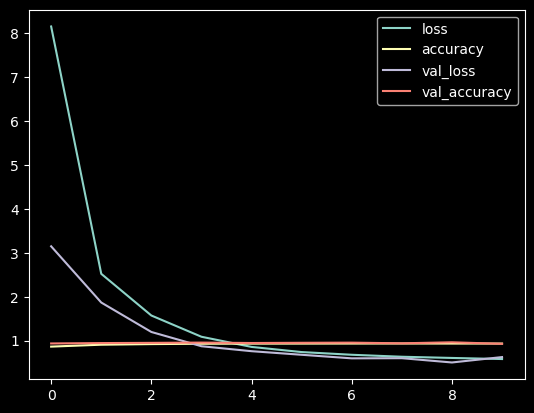

In [42]:
pd.DataFrame(history.history).plot()

In [43]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6174 - accuracy: 0.9298


[0.6174367666244507, 0.9297999739646912]

In [44]:
x_new = X_test[:3]
# x_new

In [45]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [46]:
y_prob = model_clf.predict(x_new)
y_prob.round(1)

1/1 [==============================] - 0s 119ms/step


array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]], dtype=float32)

In [47]:
y_prob

array([[1.3367998e-07, 3.1303814e-06, 3.3626652e-06, 2.5295385e-05,
        7.3905626e-06, 1.0256234e-06, 6.5997774e-08, 9.9994743e-01,
        9.7909549e-07, 1.1170746e-05],
       [3.9338636e-05, 3.2826982e-02, 8.4152842e-01, 1.2431125e-01,
        4.6999394e-06, 1.2090449e-03, 7.4265256e-05, 4.1189141e-06,
        1.7151350e-06, 1.2925493e-07],
       [7.0758638e-06, 9.8738295e-01, 1.4873861e-03, 3.3795810e-03,
        3.0044401e-05, 4.5627174e-03, 1.3841275e-04, 4.0399481e-04,
        2.5864304e-03, 2.1254684e-05]], dtype=float32)

In [48]:
y_pred = np.argmax(y_prob, axis = -1)

In [49]:
y_pred

array([7, 2, 1], dtype=int64)

In [50]:
actual

array([7, 2, 1], dtype=uint8)

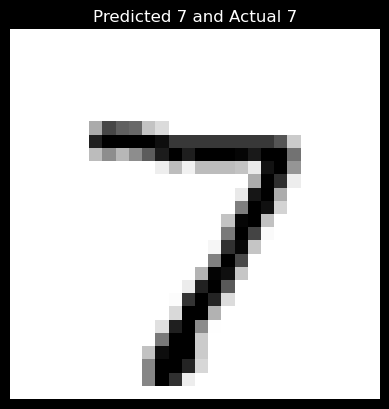

######################


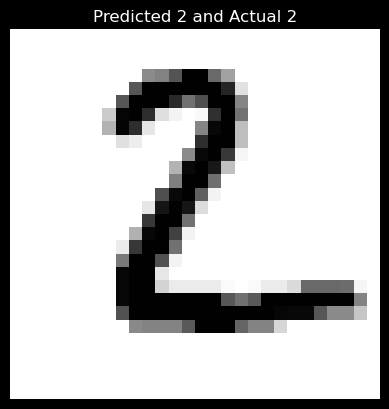

######################


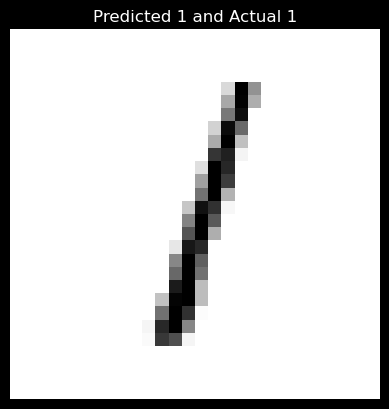

######################


In [51]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")